In [1]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt

from fuzzywuzzy import process

In [2]:
manual_mapping = {
    "Palestinian Territories": "Palestine, State of",
    "Palestinian Territories*": "Palestine, State of",
    "Somaliland Region": "Somaliland Region",
    "Somaliland region": "Somaliland Region",
    "Congo (Brazzaville)": "Congo (Brazzaville)",
    "Congo (Kinshasa)": "Congo (Kinshasa)",
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Hong Kong S.A.R., China" : "Hong Kong",
    "Northern Cyprus": "North Cyprus",
    "North Cyprus": "North Cyprus",
}

In [3]:
def standardize_country_name(country_name):
    if country_name in manual_mapping:
        return manual_mapping[country_name]
    try:
        country = pycountry.countries.lookup(country_name)
        return country.name
    except LookupError:
        country_names = [country.name for country in pycountry.countries]
        best_match, score = process.extractOne(country_name, country_names)
        if score >= 80: 
            try:
                country = pycountry.countries.lookup(best_match)
                return country.name
            except LookupError:
                return country_name 
        else:
            return country_name

In [12]:
df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')
df2020 = pd.read_csv('2020.csv')
df2021 = pd.read_csv('2021.csv')
df2022 = pd.read_csv('2022.csv')
df2023 = pd.read_csv('2023.csv')
df2024 = pd.read_csv('2024.csv')
df_list = [df2015, df2016, df2017, df2018, df2019, 
           df2020, df2021, df2022, df2023, df2024]
years = [2015, 2016, 2017, 2018, 2019, 
         2020, 2021, 2022, 2023, 2024]

In [13]:
for i in range(len(df_list)):
    dftemp = df_list[i]
    dftemp['Country'] = dftemp['Country'].apply(standardize_country_name)
    df_list[i] = dftemp

In [14]:
country_master = set(df_list[0]['Country'])
for i in range(1,len(df_list)):
    temp = set(df_list[i]['Country'])
    country_master = country_master.union(temp)
country_master = sorted(list(country_master))

In [15]:
df_list[0][['Country', 'Score']].head(20)

,Country,Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.406
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.286
9,Australia,7.284


In [16]:
for i in range(2,len(df_list)):
    dftemp = df_list[i]
    dftemp = dftemp.merge(df2015[['Country', 'Region']], on="Country", how='left')
    df_list[i] = dftemp

In [17]:
for i in range(len(df_list)):
    dftemp = df_list[i]
    dftemp['Year'] = years[i]
    df_list[i] = dftemp
dfCombo = pd.concat(df_list, ignore_index=True)

In [18]:
dfCombo.to_csv('whs_years.csv', index=False)

In [19]:
finland = []
us = []
for i in range(len(df_list)):
    finland.append(df_list[i].loc[df_list[i]['Country'] == 'Finland', 'Score'].iloc[0])
    us.append(df_list[i].loc[df_list[i]['Country'] == 'United States', 'Score'].iloc[0])

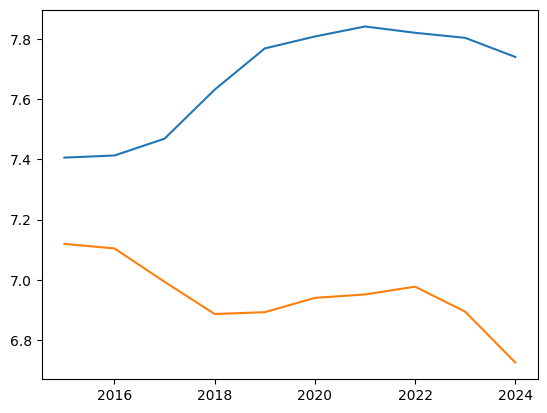

In [20]:
plt.figure()
plt.plot(years, finland)
plt.plot(years, us)
plt.show()